# MACHINE LEARNING 7 to 11

## 2.1. Problem Statement: Machine Learning 7

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [12]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)
nba.head(10)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
5,Cole Aldrich,C,25,NYK,46,2,330,33,61,0.541,...,92,129,14,8,30,18,40,92,2013-2014,2013
6,LaMarcus Aldridge,PF,28,POR,69,69,2498,652,1423,0.458,...,599,765,178,63,68,123,147,1603,2013-2014,2013
7,Lavoy Allen,PF,24,TOT,65,2,1072,134,300,0.447,...,192,311,71,24,33,44,126,303,2013-2014,2013
8,Ray Allen,SG,38,MIA,73,9,1936,240,543,0.442,...,182,205,143,54,8,84,115,701,2013-2014,2013
9,Tony Allen,SG,32,MEM,55,28,1278,204,413,0.494,...,129,208,94,90,19,90,121,495,2013-2014,2013


In [13]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [14]:
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,...,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,...,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,...,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,...,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,...,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,...,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,...,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


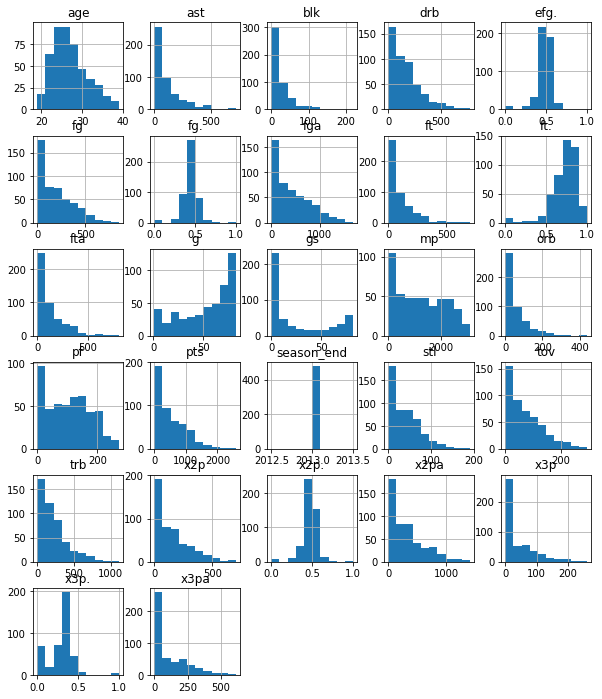

In [15]:
nba.hist(figsize=(10,12))
plt.show()

In [16]:
df =nba.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [17]:
df.drop('player', inplace=True, axis=1)
#df.drop('age', inplace=True, axis=1)
df.drop('bref_team_id', inplace=True, axis=1)
df.drop('season', inplace=True, axis=1)
df.drop('season_end', inplace=True, axis=1)

In [18]:
df.isnull().sum()

pos      0
age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      2
x3p      0
x3pa     0
x3p.    67
x2p      0
x2pa     0
x2p.     3
efg.     2
ft       0
fta      0
ft.     20
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

In [ ]:
# So we can see that "fg.", "x2p.", "efg." have a small number of null values
# We can drop them

In [20]:
df.dropna(subset=['fg.'], inplace=True)
df.dropna(subset=['x2p.'], inplace=True)
df.dropna(subset=['efg.'], inplace=True)

In [23]:
df.isnull().sum()

pos      0
age      0
g        0
gs       0
mp       0
fg       0
fga      0
fg.      0
x3p      0
x3pa     0
x3p.    65
x2p      0
x2pa     0
x2p.     0
efg.     0
ft       0
fta      0
ft.     18
orb      0
drb      0
trb      0
ast      0
stl      0
blk      0
tov      0
pf       0
pts      0
dtype: int64

In [24]:
# Observation: x3p. and ft. contains significant no. of null values so we would not take those features in model, almost we taking this df as clear

In [25]:
df.drop('x3p.', axis=1, inplace=True)
df.drop('ft.', axis=1, inplace=True)

In [26]:
df['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [27]:
df.columns

Index(['pos', 'age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x2p',
       'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pts'],
      dtype='object')

In [28]:
X=df[df.columns[:-1]] # features
Y=df[df.columns[-1]] #target variable

In [29]:
X.shape, Y.shape

((478, 24), (478,))

### Creating pos dummies¶

##### this is the only object column now

In [31]:
for c in X.columns:
    if X[c].dtypes == 'object':
        X= pd.get_dummies(X, columns=[c])

In [32]:
#confirming extra columns 
set(X.columns)-set(df.columns)

{'pos_C', 'pos_F', 'pos_G', 'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG'}

In [33]:
X.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x2p',
       'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'orb', 'drb', 'trb', 'ast', 'stl',
       'blk', 'tov', 'pf', 'pos_C', 'pos_F', 'pos_G', 'pos_PF', 'pos_PG',
       'pos_SF', 'pos_SG'],
      dtype='object')

In [46]:
#Splitting the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((382, 30), (96, 30), (382,), (96,))

In [48]:
X_train.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x2p,...,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
208,23,34,34,1143,203,454,0.447,30,77,173,...,12,105,92,0,0,0,0,1,0,0
265,30,69,67,2288,513,981,0.523,0,1,513,...,26,152,206,0,0,0,1,0,0,0
200,23,70,23,1856,344,639,0.538,0,1,344,...,116,114,185,0,0,0,1,0,0,0
278,27,79,79,2862,457,1080,0.423,190,500,267,...,15,194,267,0,0,0,0,1,0,0
379,24,65,13,1089,143,300,0.477,0,0,143,...,47,44,134,1,0,0,0,0,0,0


In [49]:
# scaling values
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [50]:
# Applying KNN Algorithm to the X_train
from sklearn.neighbors import KNeighborsRegressor
classifier = KNeighborsRegressor(n_neighbors=5, metric= "minkowski", p =2)
classifier.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Text(0.5, 1.0, 'Actual Pts vs Predicted Pts')

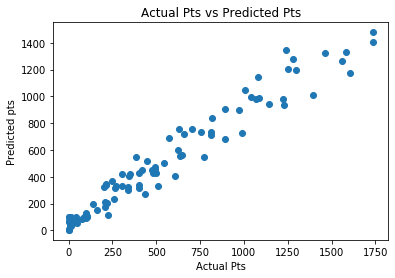

In [51]:
#Predicting the test data
y_pred = classifier.predict(X_test)

#Plotting the scatter plots
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Pts")
plt.ylabel("Predicted pts")
plt.title("Actual Pts vs Predicted Pts")

In [52]:
# error calculation
import math
print(mean_squared_error(y_test, y_pred))

print(math.sqrt(mean_squared_error(y_test, y_pred)))

15356.644166666667
123.9219277071926


In [53]:
rmse = []
for K in range(20):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value, metric= "minkowski", p =2)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    rmse.append(math.sqrt(mean_squared_error(y_test, y_pred)))
    print('Value RMS for k = ' , K , 'is :', math.sqrt(mean_squared_error(y_test, y_pred)))

Value RMS for k =  0 is : 132.00059185473376
Value RMS for k =  1 is : 118.7457565031273
Value RMS for k =  2 is : 127.32134814886481
Value RMS for k =  3 is : 122.57805761364199
Value RMS for k =  4 is : 123.9219277071926
Value RMS for k =  5 is : 118.76593338525308
Value RMS for k =  6 is : 121.04430269238497
Value RMS for k =  7 is : 118.84720870482018
Value RMS for k =  8 is : 123.1579996407639
Value RMS for k =  9 is : 126.04244242185514
Value RMS for k =  10 is : 127.11424927657012
Value RMS for k =  11 is : 126.08196755842121
Value RMS for k =  12 is : 127.32289130938187
Value RMS for k =  13 is : 127.23606029892296
Value RMS for k =  14 is : 130.30367824744937
Value RMS for k =  15 is : 133.32102400862487
Value RMS for k =  16 is : 136.76544868552233
Value RMS for k =  17 is : 136.8939686576271
Value RMS for k =  18 is : 139.01715004106566
Value RMS for k =  19 is : 141.8492765777288


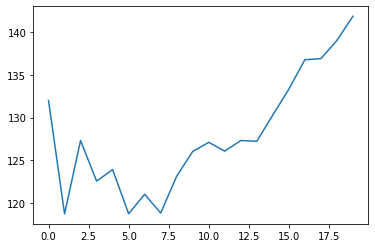

In [54]:
# ploting rmse
plt.plot(range(20), rmse)

In [55]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor(metric= "minkowski", p =2)

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 4}